# Clockmon library analysis
In this notebook we retrieve $C_{\Sigma}$ and $C_{qr}$ from the capacitance matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from modeling.qubits.clockmon.libraries.clockmon_library import clockmon_library, get_csigma_cqr
# from modeling.utils.qubits import get_csigma_cqr 

In [2]:
clockmon_lib, cw, cm = clockmon_library()
coupler_widths = np.linspace(20, 350, 1001)

In [3]:
c_sigmas, c_qrs = get_csigma_cqr(clockmon_lib(coupler_widths))

c_sigmas_p, c_qrs_q = get_csigma_cqr(clockmon_lib(cw))

Text(0.5, 0, 'Coupler length [μm]')

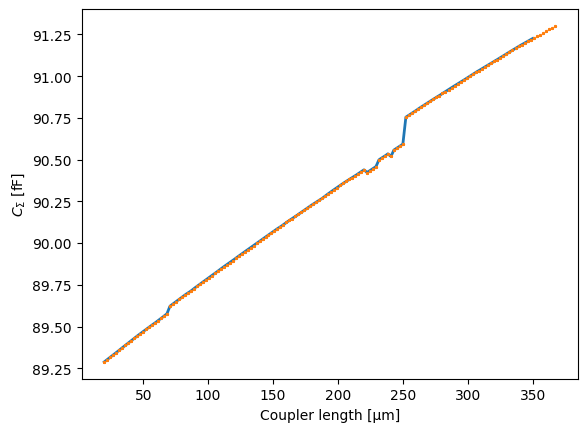

In [8]:
plt.plot(coupler_widths, c_sigmas/1e-15, linewidth = 2)
plt.plot(cw, c_sigmas_p/1e-15, '*', markersize = 2)

plt.ylabel(r"$C_\Sigma$ [fF]")
plt.xlabel("Coupler length [μm]")

Text(0.5, 0, 'coupler length')

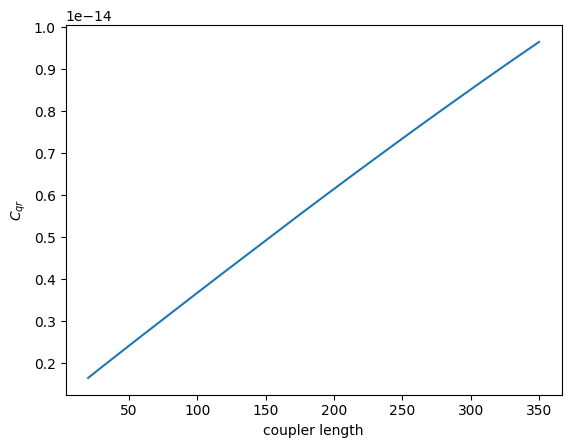

In [9]:
plt.plot(coupler_widths, c_qrs)
plt.ylabel(r"$C_{qr}$")
plt.xlabel("coupler length")

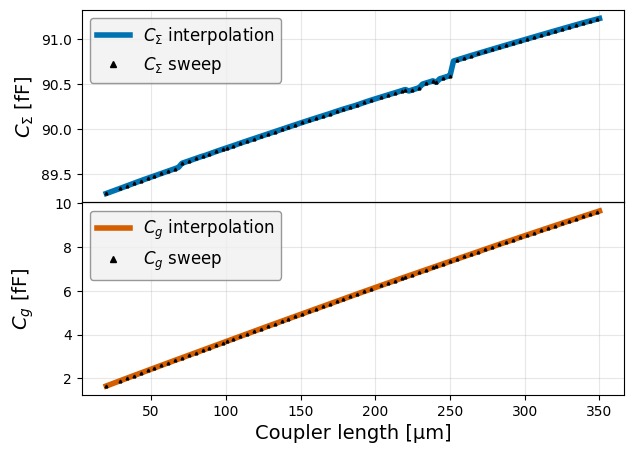

In [51]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

fig, (ax1, ax2) = plt.subplots(
    2, 1, sharex=True, figsize=(7, 5)
)

# --- Top plot -------------------------------------------------------
l1, = ax1.plot(
    coupler_widths, c_sigmas / 1e-15,
    color="C0", linewidth=4, label=r"Fit $C_\Sigma$"
)
l2, = ax1.plot(
    cw[::2][:-4], c_sigmas_p[::2][:-4] / 1e-15,
    marker="^", markersize=2, linestyle="None",
    color="black", label="Data"
)
ax1.set_ylabel(r"$C_\Sigma$ [fF]", fontsize=14)
ax1.grid(True, alpha=0.3)

leg1 = ax1.legend(
    handles=[l1, l2],
    labels=[r"$C_\Sigma$ interpolation", r"$C_\Sigma$ sweep"],
    frameon=True,
    fontsize=12,          # keep text size
    facecolor="#f0f0f0",
    edgecolor="gray",
    markerscale=2.5       # <-- enlarge only the marker symbol
)

# --- Bottom plot ----------------------------------------------------
l3, = ax2.plot(
    coupler_widths, c_qrs / 1e-15,
    color="C2", linewidth=4, label=r"Fit $C_g$"
)
l4, = ax2.plot(
    cw[::2][:-4], c_qrs_q[::2][:-4] / 1e-15,
    marker="^", markersize=2, linestyle="None",
    color="black", label="Data", alpha=1
)
ax2.set_ylabel(r"$C_{g}$ [fF]", fontsize=14)
ax2.set_xlabel("Coupler length [μm]", fontsize=14)
ax2.grid(True, alpha=0.3)

leg2 = ax2.legend(
    handles=[l3, l4],
    labels=[r"$C_g$ interpolation", r"$C_g$ sweep"],
    frameon=True,
    fontsize=12,
    facecolor="#f0f0f0",
    edgecolor="gray",
    markerscale=2.5       # enlarge the marker symbol only
)

# Layout tweaks
fig.subplots_adjust(hspace=0)
fig.align_ylabels([ax1, ax2])

plt.savefig("sweep_cplength.svg", bbox_inches="tight")
plt.show()

